<a href="https://colab.research.google.com/github/zahran1234/machine-learning-/blob/main/extract_features_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score ,classification_report
from keras.datasets import mnist
import numpy as np
import seaborn as sns

In [20]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# use 10000 from 70000 samples
y = train_y[:60000]
X = train_X[:60000]

In [21]:
#divide the image into celles
def split(array, nrows, ncols):
    r, h = array.shape

    return (array.reshape(h // nrows, nrows, -1, ncols)
            .swapaxes(1, 2)
            .reshape(-1, nrows, ncols))

In [22]:
#get cetroid
def centroid(matrix, X, Y):
    y = 0
    x = 0
    counter = 0
    my_mat = []
    for i in range(X):
        for j in range(Y):
            if matrix[i][j] == 0:
                list = [[j, i]]
                my_mat.append([j, Y - i])
                counter += 1

    for i in my_mat:
        x = x + i[0]
        y = y + i[1]
    if counter == 0:
        return 0, 0

    return (x / counter), (y / counter)

In [23]:
new_data = np.empty((1, 32))
list = []

for phote in X:
    x2 = 0
    y2 = 0
    row = []
    list = split(phote, 7, 7)

    for i in list:
        x1, y1 = centroid(i, 7, 7)
        row.append(x1)
        row.append(y1)
    new_data = np.vstack([new_data, row])
new_data = np.delete(new_data, 0, 0)
print(" ")
#9000 samples for train the model 1000 samples for test
[X_train, X_test, y_train, y_test] = train_test_split(new_data, y, test_size=0.1, random_state=44, shuffle=True)

# KNN

KNNClassifierModel = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto')
KNNClassifierModel.fit(X_train, y_train)



print('----------------------------------------------------')

# Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
# y_pred_prob = KNNClassifierModel.predict_proba(X_test)









 
----------------------------------------------------


KNNClassifierModel Test Score is :  90.93333333333334
classification_report:                precision    recall  f1-score   support

           0       0.97      0.95      0.96       572
           1       0.93      0.98      0.95       637
           2       0.96      0.91      0.94       599
           3       0.90      0.90      0.90       628
           4       0.92      0.89      0.90       600
           5       0.84      0.87      0.85       529
           6       0.91      0.96      0.93       604
           7       0.93      0.92      0.93       611
           8       0.90      0.82      0.86       630
           9       0.85      0.88      0.86       590

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

Predicted Value for KNNClassifierModel is :  [9 2 8 0 4 7 0 5 1 4 1 9 4 6 6 3 9 8 7 5]
y Value for KNNClassifierModel is :          [9 2 2 0 4 7 0 5 1 4 1 9 4 1 6 

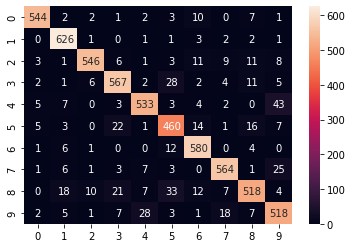

In [24]:
# Calculating Details

print('KNNClassifierModel Test Score is : ', 100 * KNNClassifierModel.score(X_test, y_test))
print("classification_report: ", classification_report(y_test,y_pred ))

con_mat=confusion_matrix(y_test,y_pred)

sns.heatmap(con_mat,annot=True,fmt = '.0f')
print('Predicted Value for KNNClassifierModel is : ', y_pred[:20])
print('y Value for KNNClassifierModel is :         ', y_test[:20])

implementation of KKN model


In [25]:

class KNN:
    # euclidean_distance(x, x_train)

    def __init__(self, k):
        self.k = k  # store K (K is Number of nearest neighbour)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, z):
        list_for_all_distances = []
        list_for_min_distance_classes = []
        for i in self.X_train:
            list_for_all_distances.append(np.linalg.norm(z - i))

        for x in range(self.k):
            min_distance = min(list_for_all_distances)
            index = list_for_all_distances.index(min_distance)
            list_for_all_distances[index] = float('inf')
            list_for_min_distance_classes.append(self.y_train[index])
        predicted_class = list_for_min_distance_classes.count(0)
        for x in range(10):
            if predicted_class < list_for_min_distance_classes.count(x):
                predicted_class = x
        return predicted_class

    def score(self, X_test, Y_test):

        counter = 0
        counter_for_acc = 0
        for i in X_test:
            if self.predict(i) == Y_test[counter]:
                counter_for_acc += 1
            counter += 1

        return (counter_for_acc / counter) * 100


calculate score of our KNN **model**

In [26]:
knn = KNN(10)
knn.fit(new_data[:9000], y[:9000])
print("_____________________________________________________")
print(knn.score(new_data[9000:10000], y[9000:10000]))

_____________________________________________________
75.4
